<h1>In this notebook, goal is to create a histagram showing how common career durations are for hitters and pitchers<\h1>

<h3>Ensure that you have set up the baseballDB (see - DBSetUp.ipynb) before running this notebook</h3>

<h4>Import Dependencies</h4>

In [1]:
%matplotlib inline

In [2]:
import os
import csv
import pandas as pd

import sqlite3
import csv
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np

from config import pgPassword

<h4>Create a connection to SQL database</h4>

In [3]:
pg_user = 'postgres'
pg_password = pgPassword
db_name = 'baseballDB'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

<h4>Read in databases tables as DatFrames</h4>

In [4]:
teamsDF = pd.read_sql_table("teams", con = engine)
battingDF = pd.read_sql_table("batting", con = engine)
pitchingDF = pd.read_sql_table("pitching", con = engine)
playersDF = pd.read_sql_table("players", con = engine)
franchisesDF = pd.read_sql_table("franchises", con = engine)
salariesDF = pd.read_sql_table("salaries", con = engine)

In [6]:
playersDF.head()

,playerID,birthYear,nameFirst,nameLast,debut,finalGame
0,aardsda01,1981.0,David,Aardsma,2004-04-06,2015-08-23
1,aaronha01,1934.0,Hank,Aaron,1954-04-13,1976-10-03
2,aaronto01,1939.0,Tommie,Aaron,1962-04-10,1971-09-26
3,aasedo01,1954.0,Don,Aase,1977-07-26,1990-10-03
4,abadan01,1972.0,Andy,Abad,2001-09-10,2006-04-13


In [15]:
newPlayersDF = playersDF
newPlayersDF["debutYear"] = newPlayersDF.debut.dt.year
newPlayersDF["finalYear"] = newPlayersDF.finalGame.dt.year
newPlayersDF["careerYears"] = newPlayersDF.finalYear + 1 - newPlayersDF.debutYear
newPlayersDF.head()


,playerID,birthYear,nameFirst,nameLast,debut,finalGame,debutYear,finalYear,careerYears
0,aardsda01,1981.0,David,Aardsma,2004-04-06,2015-08-23,2004.0,2015.0,12.0
1,aaronha01,1934.0,Hank,Aaron,1954-04-13,1976-10-03,1954.0,1976.0,23.0
2,aaronto01,1939.0,Tommie,Aaron,1962-04-10,1971-09-26,1962.0,1971.0,10.0
3,aasedo01,1954.0,Don,Aase,1977-07-26,1990-10-03,1977.0,1990.0,14.0
4,abadan01,1972.0,Andy,Abad,2001-09-10,2006-04-13,2001.0,2006.0,6.0


In [10]:
battingDF.head()

,playerID,yearID,teamID,stint,G,R,H,HR,BB,IBB,SO,SB
0,abercda01,1871,TRO,1,1,0,0,0,0,NaN,0.0,0.0
1,addybo01,1871,RC1,1,25,30,32,0,4,NaN,0.0,8.0
2,allisar01,1871,CL1,1,29,28,40,0,2,NaN,5.0,3.0
3,allisdo01,1871,WS3,1,27,28,44,2,0,NaN,2.0,1.0
4,ansonca01,1871,RC1,1,25,29,39,0,2,NaN,1.0,6.0


In [16]:
fullBattersDF = pd.merge(battingDF["playerID"], newPlayersDF[["playerID", "debutYear", "finalYear","careerYears"]], on = ["playerID"])
fullBattersDF.head()

,playerID,debutYear,finalYear,careerYears
0,abercda01,1871.0,1871.0,1.0
1,addybo01,1871.0,1877.0,7.0
2,addybo01,1871.0,1877.0,7.0
3,addybo01,1871.0,1877.0,7.0
4,addybo01,1871.0,1877.0,7.0


In [21]:
max_years = fullBattersDF["careerYears"].max()
print(max_years)

36.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289E8AFBD08>]],
      dtype=object)

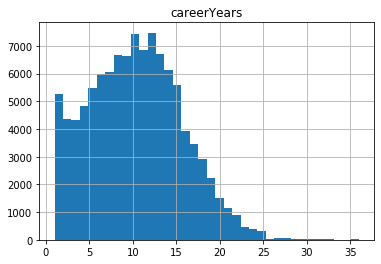

In [22]:
fullBattersDF.hist(column = "careerYears", bins = 36)

In [23]:
fullPitchersDF = pd.merge(pitchingDF["playerID"], newPlayersDF[["playerID", "debutYear", "finalYear","careerYears"]], on = ["playerID"])
fullPitchersDF.head()

,playerID,debutYear,finalYear,careerYears
0,bechtge01,1871.0,1876.0,6.0
1,bechtge01,1871.0,1876.0,6.0
2,bechtge01,1871.0,1876.0,6.0
3,bechtge01,1871.0,1876.0,6.0
4,bechtge01,1871.0,1876.0,6.0


In [24]:
max_years = fullPitchersDF["careerYears"].max()
print(max_years)

36.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289E8CB9E08>]],
      dtype=object)

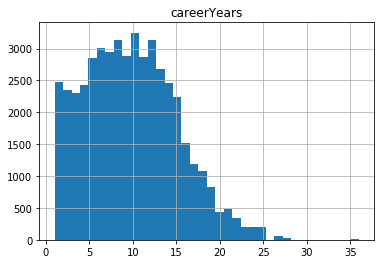

In [26]:
fullPitchersDF.hist(column = "careerYears", bins = 36)